In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
!pip install xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openpyxl --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xlrd

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/other_datasets/time_series_375_prerpocess_en.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:
df.shape

(6120, 81)

In [ ]:
df.head(5)

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.drop_duplicates(subset =("Admission time","Discharge time"),keep = False, inplace = True)
# Dropping Duplicates

In [ ]:
# df[df.columns] = pd.concat([s.dropna().reset_index(drop=True) for i,s in df.iterrows()], 1).T


In [ ]:
import numpy as np

In [ ]:
y=df['outcome']

In [ ]:
df.drop('outcome',axis=1,inplace=True)

In [ ]:
import datetime


In [ ]:
from scipy import sparse
import scipy
from scipy.sparse import csr_matrix


|**age**|**gender**|**Admission time**|**Discharge time**|**outcome**|**Hypersensitive cardiac troponinI**|**hemoglobin**|
|-------|---------|---------|-------|--------|--------|----------|
|73|1|2020-01-30 22:12:47|2020-02-17 12:40:09|0|NaN|NaN|
|73|1|2020-01-30 22:12:47|2020-02-17 12:40:09|0|NaN|136.0|
|73|1|2020-01-30 22:12:47|2020-02-17 12:40:09|0|NaN|NaN|
|73|1|2020-01-30 22:12:47|2020-02-17 12:40:09|0|NaN|NaN|
|73|1|2020-01-30 22:12:47|2020-02-17 12:40:09|0|19.9|NaN|



In [ ]:
y.value_counts()

0    3215
1    2905
Name: outcome, dtype: int64

In [ ]:
df.drop('PATIENT_ID', axis=1, inplace=True)

In [ ]:
# The best method is to resample the data to remain with records with a reasonable amount
# 

In [ ]:
# df=df.iloc[:,1:]

In [ ]:
# df.drop('RESULT',axis=1,inplace=True)

In [ ]:
L=list(df.columns)

In [ ]:
df.columns[df.isnull().any()]


Index(['RE_DATE', 'Hypersensitive cardiac troponinI', 'hemoglobin',
       'Serum chloride', 'Prothrombin time', 'procalcitonin', 'eosinophils(%)',
       'Interleukin 2 receptor', 'Alkaline phosphatase', 'albumin',
       'basophil(%)', 'Interleukin 10', 'Total bilirubin', 'Platelet count',
       'monocytes(%)', 'antithrombin', 'Interleukin 8', 'indirect bilirubin',
       'Red blood cell distribution width ', 'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume', 'ferritin', 'RBC distribution width SD'

Remove all columns with 30% of missing data

In [ ]:
# L=[]
# L_less=[]
# for i in df.columns:
#   if((df[i].isnull().sum())<(0.50*(df.shape[0]))):
#     L.append(i)
#   else:
#     L_less.append(i)



In [ ]:
len(L)

79

In [ ]:
# len(L_less)

In [ ]:
# df[L].head(2)

In [ ]:
import numpy as np

In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
numeric_data.shape

(6120, 76)

In [ ]:
non_numeric.shape

(6120, 3)

In [ ]:
non_numeric.head()

,RE_DATE,Admission time,Discharge time
0,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09
1,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09
2,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09
3,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09
4,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09


# Imputation Methods

Using a multivariate imputation method to deal with missing values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit(numeric_data)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


IterativeImputer(random_state=0)

In [ ]:
imputed_numeric=np.round(imp.transform(numeric_data))

In [ ]:
imputed_numeric.shape

(6120, 76)

In [ ]:
num_df=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

Using a Univariate(Median) imputation method to deal with missing values

In [ ]:
from sklearn.impute import SimpleImputer
i = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
i.fit(numeric_data)

SimpleImputer(strategy='median')

In [ ]:
simple_imputed=np.round(i.transform(numeric_data))

In [ ]:
simple_imputed_df=pd.DataFrame(simple_imputed, columns=numeric_data.columns)

Using a Regression approach to predict missing values in numeric_data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
imp_mean = IterativeImputer(estimator=xgb.XGBRegressor(), random_state=0)
imp_mean.fit(numeric_data)
regressor_imputed_df=pd.DataFrame(imp_mean.transform(numeric_data))

[09:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
num_df.head()

,age,gender,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,73.0,1.0,2267.0,1.970300e+04,103.0,91.0,2.0,-4.350213e+17,867.0,60.0,...,5.074669e+16,179.0,-4182.0,-0.0,141.0,-2.413352e+17,36.0,39.0,72.0,200.0
1,73.0,1.0,2267.0,1.360000e+02,103.0,91.0,2.0,1.000000e+00,867.0,60.0,...,3.200000e+01,179.0,-4182.0,-0.0,141.0,0.000000e+00,36.0,39.0,72.0,200.0
2,73.0,1.0,9457.0,6.209753e+17,103.0,-478.0,-6.0,-1.380229e+31,740.0,46.0,...,1.610083e+30,-750.0,43.0,-1.0,138.0,-7.657045e+30,62.0,16.0,47.0,130.0
3,73.0,1.0,-1409.0,-2.855896e+17,101.0,14.0,5.0,6.347506e+30,923.0,-38.0,...,-7.404578e+29,606.0,-11696.0,0.0,140.0,3.521383e+30,24.0,39.0,10.0,779.0
4,73.0,1.0,20.0,-1.377276e+17,102.0,217.0,0.0,3.061127e+30,894.0,13.0,...,-3.570907e+29,385.0,-7805.0,0.0,141.0,1.698211e+30,30.0,39.0,42.0,479.0


In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RE_DATE         6106 non-null   object
 1   Admission time  6120 non-null   object
 2   Discharge time  6120 non-null   object
dtypes: object(3)
memory usage: 143.6+ KB


In [ ]:
import datetime


In [ ]:
from sklearn.preprocessing import StandardScaler


## Joining and Scaling Data Imputed by The Regressor model

In [ ]:
regressor_scaled=StandardScaler().fit_transform(regressor_imputed_df)

In [ ]:
regressor_imputed_df=pd.DataFrame(regressor_scaled, columns=numeric_data.columns)

In [ ]:
data=regressor_imputed_df


In [ ]:
X=data

## Reducing Dimensionality of X Imputed by Regressor Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC


In [ ]:
X.shape

(6120, 76)

The following code computes PCA without reducing dimensionality, then computes the minimum
number of dimensions required to preserve 95% of the training set’s variance:

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced.shape

(6120, 40)

Features selected by PCA from the initial number of features

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
selected_features=list(df.iloc[:,1])

In [ ]:
pca.n_components_


40

In [ ]:
selected_features

['Tumor necrosis factorα',
 'basophil count(#)',
 'RBC distribution width SD',
 'Uric acid',
 'ESR',
 'Uric acid',
 'indirect bilirubin',
 'monocytes count',
 'Serum potassium',
 'ESR',
 'Serum potassium',
 'International standard ratio',
 'Interleukin 1β',
 'Interleukin 1β',
 'aspartate aminotransferase',
 'Corrected calcium',
 'globulin',
 'HBsAg',
 'globulin',
 '2019-nCoV nucleic acid detection',
 'Thrombin time',
 'Thrombin time',
 'Thrombin time',
 'Thrombin time',
 'HIV antibody quantification',
 'age',
 'Red blood cell count',
 'HCV antibody quantification',
 'Interleukin 8',
 'Interleukin 10',
 'HCV antibody quantification',
 'Interleukin 8',
 'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
 'eosinophils(%)',
 'Uric acid',
 'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
 'HCO3-',
 'Red blood cell count',
 'neutrophils count',
 'indirect bilirubin']

Training Models with PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
batch_size = 128
num_classes = 1
epochs = 50

In [ ]:
# model = Sequential()
# model.add(Dense(42, activation='relu', input_dim=(40)))
# model.add(Dense(44, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# model.summary()


In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])



In [ ]:
# history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
import pickle
from sklearn import metrics

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       804
           1       0.84      0.81      0.82       726

    accuracy                           0.84      1530
   macro avg       0.84      0.83      0.84      1530
weighted avg       0.84      0.84      0.84      1530



In [ ]:
import xgboost as xgb


In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       804
           1       0.82      0.84      0.83       726

    accuracy                           0.84      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.84      0.84      0.84      1530



In [ ]:
XGB_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGB_Regressor_imputed_PCA_Non_Cross_accuracy

0.84

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       804
           1       0.83      0.83      0.83       726

    accuracy                           0.84      1530
   macro avg       0.83      0.83      0.83      1530
weighted avg       0.84      0.84      0.84      1530



In [ ]:
SVC_Regressor_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_accuracy

0.84

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


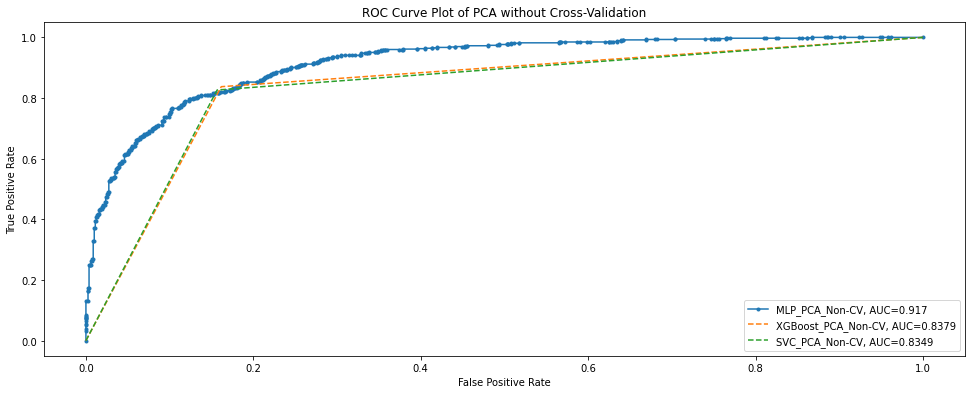

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross-Validation")
plt.legend()

## Training Models with PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(42, activation='relu', input_dim=(40)))
  model.add(Dense(44, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.4250509440898895; accuracy of 82.6960802078247%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3874068558216095; accuracy of 83.72548818588257%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.38244253396987915; accuracy of 83.72548818588257%

CR by library method=
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1065
           1       0.84      0.81      0.83       975

    accuracy                           0.84      2040
   macro avg       0.84      0.84      0.84      2040
weighted avg       0.84      0.84      0.84      2040



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      1065
           1       0.89      0.85      0.87       975

    accuracy                           0.88      2040
   macro avg       0.88      0.88      0.88      2040
weighted avg       0.88      0.88      0.88      2040



In [ ]:
MLP_Regressor_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)
MLP_Regressor_imputed_PCA_Cross_Validation_AUC

0.876771397616468

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       804
           1       0.82      0.84      0.83       726

    accuracy                           0.83      1530
   macro avg       0.83      0.83      0.83      1530
weighted avg       0.83      0.83      0.83      1530



In [ ]:
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy

0.83

In [ ]:
cv = KFold(n_splits=3)


Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
#                      'C': [ 100, 1000]}
#                     ] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       804
           1       0.83      0.81      0.82       726

    accuracy                           0.83      1530
   macro avg       0.83      0.83      0.83      1530
weighted avg       0.83      0.83      0.83      1530



In [ ]:
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy

0.83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


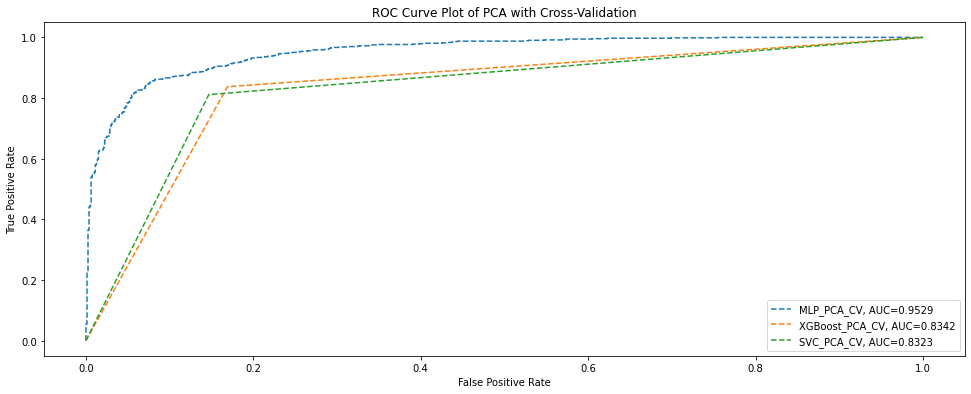

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross-Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(78, activation='relu', input_dim=(76)))
# m.add(Dense(80, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       804
           1       0.83      0.84      0.84       726

    accuracy                           0.84      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.84      0.84      0.84      1530



In [ ]:
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.84

XGB boost without K-fold cross validation


In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(np.array(Xtrain), Ytrain)
# y_pred=full_boost.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       804
           1       0.87      0.87      0.87       726

    accuracy                           0.88      1530
   macro avg       0.88      0.88      0.88      1530
weighted avg       0.88      0.88      0.88      1530



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.88

Support Vector Machine with cross validation

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       804
           1       0.83      0.83      0.83       726

    accuracy                           0.84      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.84      0.84      0.84      1530



In [ ]:
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.84

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


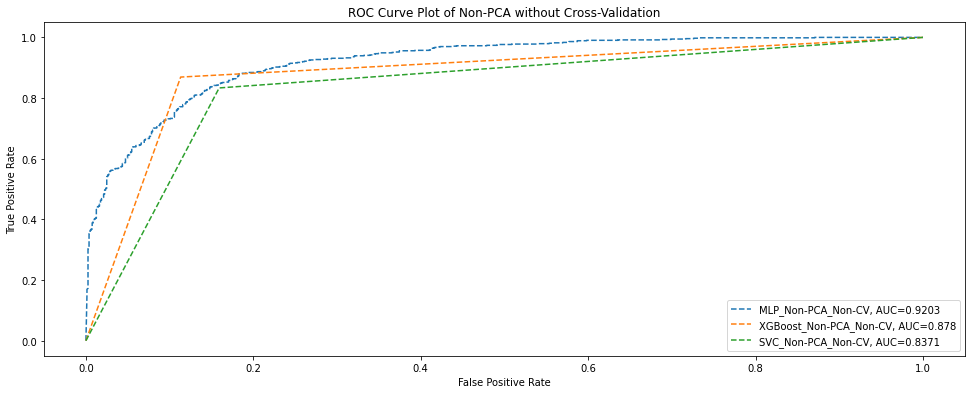

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross-Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(78, activation='relu', input_dim=(76)))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.514824628829956; accuracy of 82.40196108818054%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4589628279209137; accuracy of 83.23529362678528%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.48251664638519287; accuracy of 83.87255072593689%

CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1089
           1       0.81      0.85      0.83       951

    accuracy                           0.84      2040
   macro avg       0.84      0.84      0.84      2040
weighted avg       0.84      0.84      0.84      2040



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1089
           1       0.91      0.90      0.91       951

    accuracy                           0.92      2040
   macro avg       0.92      0.91      0.91      2040
weighted avg       0.92      0.92      0.92      2040



In [ ]:
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.92

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=2)
# PARAMETERS = {"subsample":[0.75, 1],
#              "max_depth":[5, 12],
#               "min_child_weight":[5,15],
#               "learning_rate":[0.1],}
# full = xgb.XGBClassifier(n_estimators=500, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       804
           1       0.88      0.87      0.87       726

    accuracy                           0.88      1530
   macro avg       0.88      0.88      0.88      1530
weighted avg       0.88      0.88      0.88      1530



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.88

Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
#                      'C': [ 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
#                      'C': [100, 1000] }] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       804
           1       0.83      0.82      0.83       726

    accuracy                           0.83      1530
   macro avg       0.83      0.83      0.83      1530
weighted avg       0.83      0.83      0.83      1530



In [ ]:
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


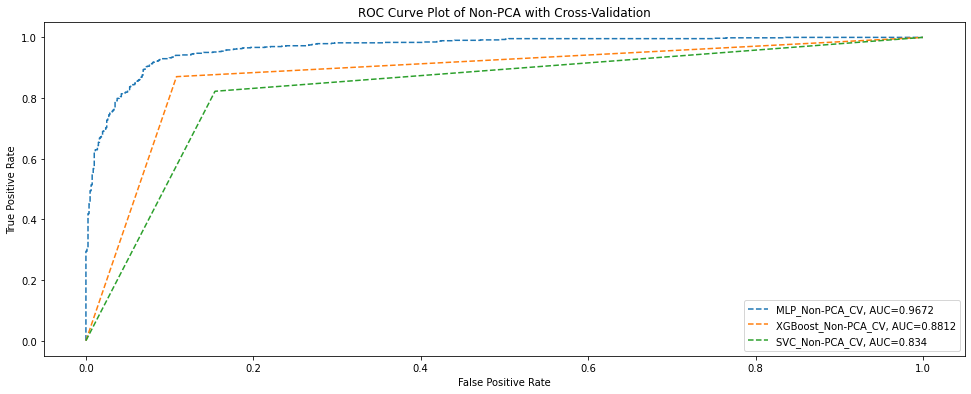

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross-Validation")
plt.legend()

### Joining and Scaling Data Imputed by the Multivariate Imputation method


In [ ]:
multivariate_scaled=StandardScaler().fit_transform(num_df)
multivariate_imputed_df=pd.DataFrame(multivariate_scaled, columns=numeric_data.columns)

In [ ]:
data=multivariate_imputed_df


In [ ]:
X=data

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(6120, 5)

In [ ]:
X.shape

(6120, 76)

## Training Models with PCA X Imputed by Multivariate Method and without Cross Validation

In [ ]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=(5)))
model.add(Dense(9, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=model.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

48/48 [==============================] - 0s 5ms/step - loss: 0.4998 - accuracy: 0.7405
Accuracy: 74.05 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.81      0.66      0.73       804
           1       0.69      0.83      0.75       726

    accuracy                           0.74      1530
   macro avg       0.75      0.74      0.74      1530
weighted avg       0.75      0.74      0.74      1530



In [ ]:
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy

0.74

In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

XGBClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=1000, nthread=4,
              seed=27, subsample=0.8)

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 80.59 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       804
           1       0.80      0.79      0.79       726

    accuracy                           0.81      1530
   macro avg       0.81      0.80      0.81      1530
weighted avg       0.81      0.81      0.81      1530



In [ ]:
XGBoost_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_accuracy

0.81

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 73.99 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       804
           1       0.70      0.79      0.74       726

    accuracy                           0.74      1530
   macro avg       0.74      0.74      0.74      1530
weighted avg       0.74      0.74      0.74      1530



In [ ]:
SVC_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_accuracy

0.74

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


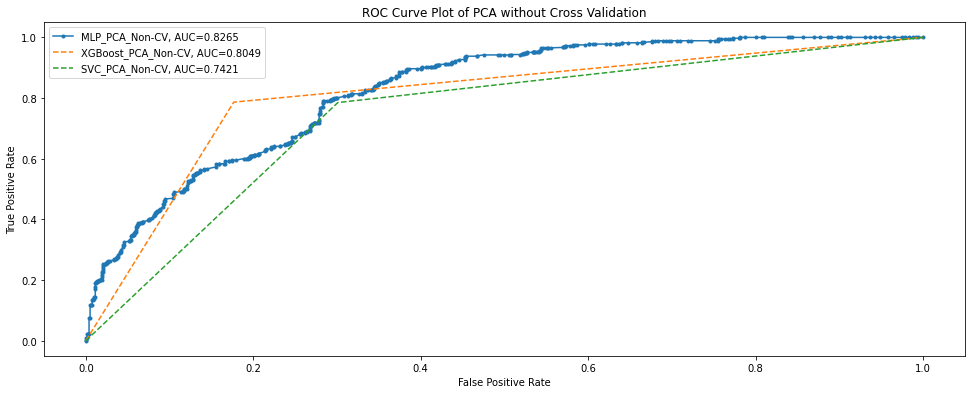

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(7, activation='relu', input_dim=(5)))
  model.add(Dense(9, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.4640359580516815; accuracy of 78.57843041419983%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4919889569282532; accuracy of 74.85294342041016%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.4594731330871582; accuracy of 77.89215445518494%

CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1075
           1       0.74      0.81      0.78       965

    accuracy                           0.78      2040
   macro avg       0.78      0.78      0.78      2040
weighted avg       0.78      0.78      0.78      2040



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1075
           1       0.74      0.81      0.78       965

    accuracy                           0.78      2040
   macro avg       0.78      0.78      0.78      2040
weighted avg       0.78      0.78      0.78      2040



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.78

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.75, 1],
#              "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1]}
# full = xgb.XGBClassifier(n_estimators=500, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 81.44 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       804
           1       0.80      0.81      0.80       726

    accuracy                           0.81      1530
   macro avg       0.81      0.81      0.81      1530
weighted avg       0.81      0.81      0.81      1530



In [ ]:
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.81

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
#                      'C': [ 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
#                      'C': [100, 1000] }] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 76.54 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       804
           1       0.72      0.83      0.77       726

    accuracy                           0.77      1530
   macro avg       0.77      0.77      0.77      1530
weighted avg       0.77      0.77      0.77      1530



In [ ]:
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.77

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


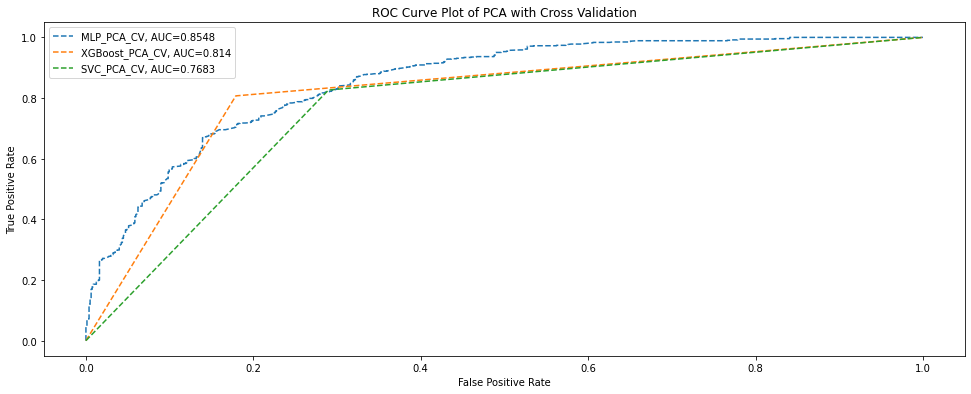

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Multivariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(78, activation='relu', input_dim=(76)))
# m.add(Dense(80, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       804
           1       0.70      0.78      0.74       726

    accuracy                           0.73      1530
   macro avg       0.74      0.74      0.73      1530
weighted avg       0.74      0.73      0.73      1530



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.73

In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(np.array(Xtrain), Ytrain)
# y_pred=full_boost.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.60      0.72       804
           1       0.67      0.92      0.78       726

    accuracy                           0.75      1530
   macro avg       0.78      0.76      0.75      1530
weighted avg       0.79      0.75      0.75      1530



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.75

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       804
           1       0.72      0.79      0.75       726

    accuracy                           0.75      1530
   macro avg       0.76      0.75      0.75      1530
weighted avg       0.76      0.75      0.75      1530



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


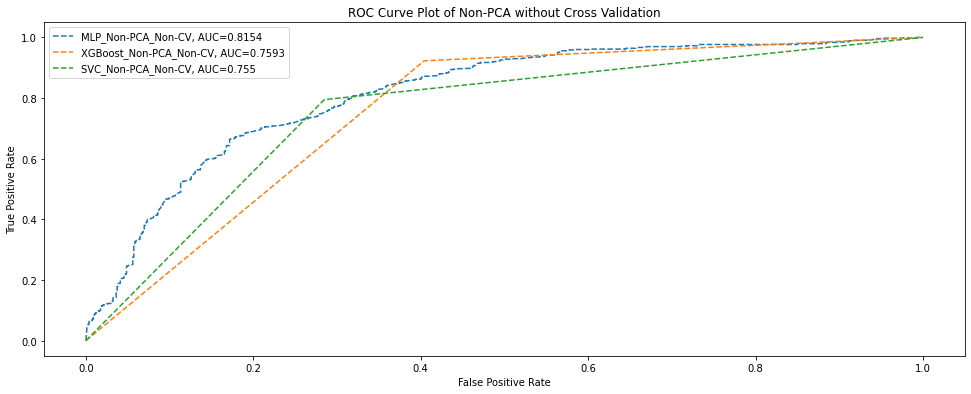

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

### Training Models with Non-PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(78, activation='relu', input_dim=(76)))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.43200966715812683; accuracy of 80.78431487083435%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.430539071559906; accuracy of 80.19607663154602%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.4612819254398346; accuracy of 78.82353067398071%

CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1064
           1       0.73      0.87      0.80       976

    accuracy                           0.79      2040
   macro avg       0.80      0.79      0.79      2040
weighted avg       0.80      0.79      0.79      2040



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      1064
           1       0.73      0.81      0.77       976

    accuracy                           0.77      2040
   macro avg       0.77      0.77      0.77      2040
weighted avg       0.77      0.77      0.77      2040



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.77

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.75, 1],
#              "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1]}
# full = xgb.XGBClassifier(n_estimators=500, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.87      0.64      0.74       804
           1       0.69      0.89      0.78       726

    accuracy                           0.76      1530
   macro avg       0.78      0.77      0.76      1530
weighted avg       0.78      0.76      0.76      1530



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.76

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
#                      'C': [ 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
#                      'C': [100, 1000] },{'kernel': ['linear'], 'C': [100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       804
           1       0.69      0.77      0.73       726

    accuracy                           0.72      1530
   macro avg       0.73      0.73      0.72      1530
weighted avg       0.73      0.72      0.72      1530



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.72

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


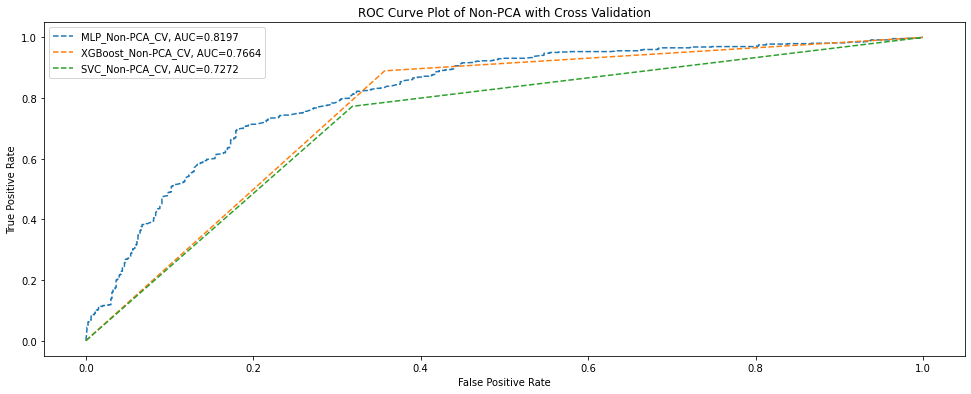

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()

# Joining and Scaling Data Imputed by the Univariate Imputation method

In [ ]:

univariate_scaled=StandardScaler().fit_transform(simple_imputed_df)
univariate_imputed_df=pd.DataFrame(univariate_scaled, columns=numeric_data.columns)

In [ ]:
data=univariate_imputed_df
X=data

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(6120, 50)

### Training Models with PCA X Imputed by Univariate Model and without Cross Validation



In [ ]:
model = Sequential()
model.add(Dense(52, activation='relu', input_dim=(50)))
model.add(Dense(54, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=model.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

48/48 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8503
Accuracy: 85.03 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       804
           1       0.89      0.78      0.83       726

    accuracy                           0.85      1530
   macro avg       0.86      0.85      0.85      1530
weighted avg       0.85      0.85      0.85      1530



In [ ]:
MLP_Univariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_PCA_Non_Cross_accuracy

0.85

In [ ]:
model=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(Xtrain, Ytrain)
y_pred=model.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 86.14 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       804
           1       0.86      0.84      0.85       726

    accuracy                           0.86      1530
   macro avg       0.86      0.86      0.86      1530
weighted avg       0.86      0.86      0.86      1530



In [ ]:
XGBoost_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_accuracy

0.86

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 84.51 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       804
           1       0.84      0.83      0.84       726

    accuracy                           0.85      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.85      0.85      0.85      1530



In [ ]:
SVC_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_accuracy

0.85

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


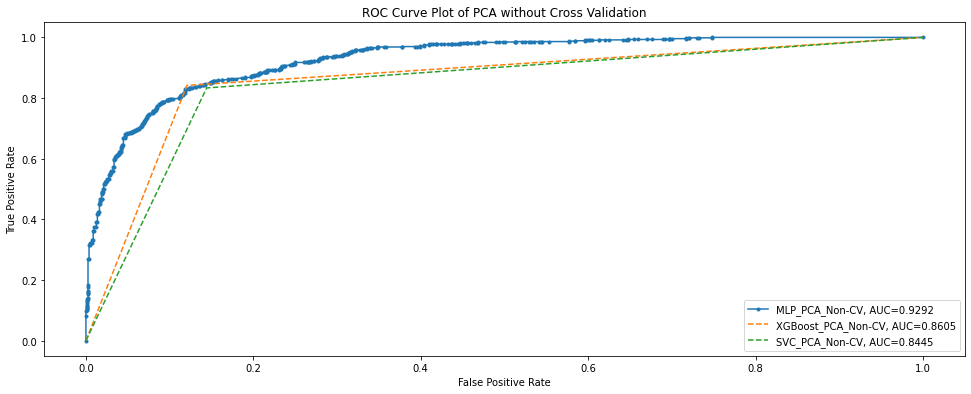

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(52, activation='relu', input_dim=(50)))
  model.add(Dense(54, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3475996255874634; accuracy of 84.60784554481506%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.34323930740356445; accuracy of 86.71568632125854%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.34998705983161926; accuracy of 85.78431606292725%

CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1065
           1       0.87      0.83      0.85       975

    accuracy                           0.86      2040
   macro avg       0.86      0.86      0.86      2040
weighted avg       0.86      0.86      0.86      2040



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1065
           1       0.87      0.83      0.85       975

    accuracy                           0.86      2040
   macro avg       0.86      0.86      0.86      2040
weighted avg       0.86      0.86      0.86      2040



In [ ]:
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy

0.86

In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.75, 1],
             "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1],
              "n_estimators":[500]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 86.27 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       804
           1       0.86      0.84      0.85       726

    accuracy                           0.86      1530
   macro avg       0.86      0.86      0.86      1530
weighted avg       0.86      0.86      0.86      1530



In [ ]:
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy

0.86

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
                     'C': [ 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
                     'C': [100, 1000] }] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 85.16 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       804
           1       0.86      0.83      0.84       726

    accuracy                           0.85      1530
   macro avg       0.85      0.85      0.85      1530
weighted avg       0.85      0.85      0.85      1530



In [ ]:
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy

0.85

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


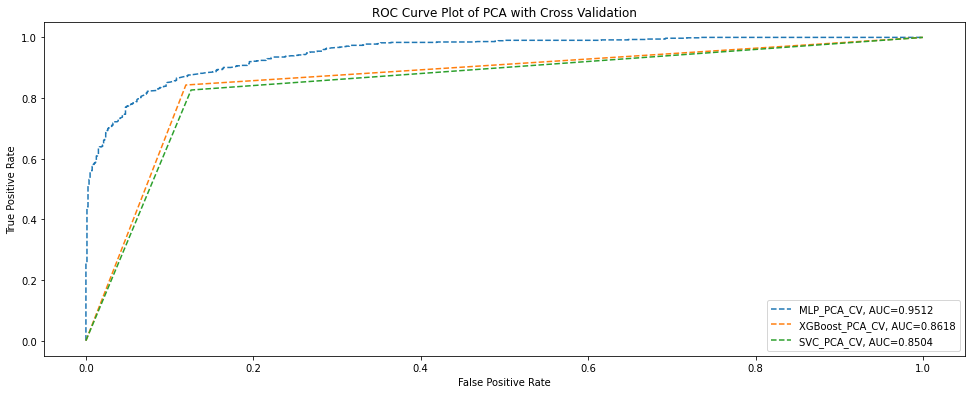

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
m = Sequential()
m.add(Dense(78, activation='relu', input_dim=(76)))
m.add(Dense(80, activation='relu'))
# m.add(Dense(128, activation='relu'))
# m.add(Dense(64, activation='relu'))
m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
m.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=m.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

48/48 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8549
Accuracy: 85.49 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(m, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       804
           1       0.88      0.80      0.84       726

    accuracy                           0.85      1530
   macro avg       0.86      0.85      0.85      1530
weighted avg       0.86      0.85      0.85      1530



In [ ]:
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.85

In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(np.array(Xtrain), Ytrain)
y_pred=full_boost.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 90.85 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       804
           1       0.91      0.89      0.90       726

    accuracy                           0.91      1530
   macro avg       0.91      0.91      0.91      1530
weighted avg       0.91      0.91      0.91      1530



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.91

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 84.71 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       804
           1       0.84      0.84      0.84       726

    accuracy                           0.85      1530
   macro avg       0.85      0.85      0.85      1530
weighted avg       0.85      0.85      0.85      1530



In [ ]:
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.85

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


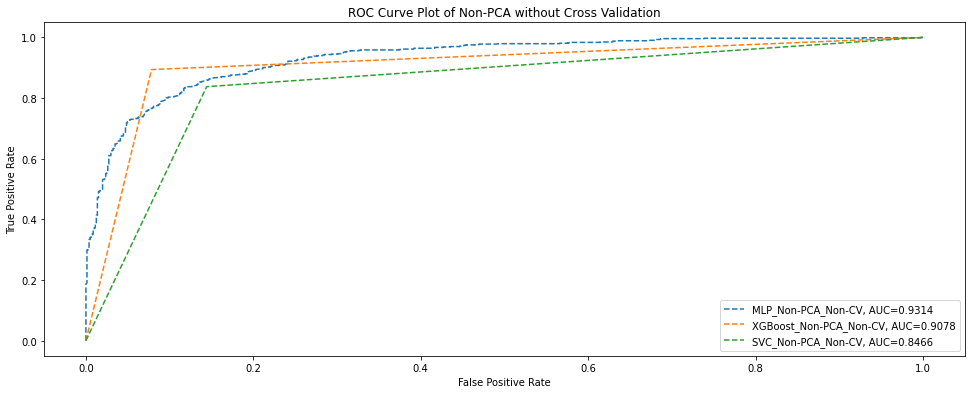

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(78, activation='relu', input_dim=(76)))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3803970217704773; accuracy of 85.34313440322876%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4566687345504761; accuracy of 84.85293984413147%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3528308570384979; accuracy of 85.09804010391235%

CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1084
           1       0.85      0.83      0.84       956

    accuracy                           0.85      2040
   macro avg       0.85      0.85      0.85      2040
weighted avg       0.85      0.85      0.85      2040



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       804
           1       0.90      0.85      0.88       726

    accuracy                           0.89      1530
   macro avg       0.89      0.88      0.88      1530
weighted avg       0.89      0.89      0.89      1530



In [ ]:
MLP_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.89

In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.75, 1],
             "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1],
              "n_estimators":[500]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 90.65 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       804
           1       0.91      0.89      0.90       726

    accuracy                           0.91      1530
   macro avg       0.91      0.91      0.91      1530
weighted avg       0.91      0.91      0.91      1530



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.91

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
                     'C': [ 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
                     'C': [100, 1000] }] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 85.16 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/3-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       804
           1       0.85      0.83      0.84       726

    accuracy                           0.85      1530
   macro avg       0.85      0.85      0.85      1530
weighted avg       0.85      0.85      0.85      1530



In [ ]:
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.85

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


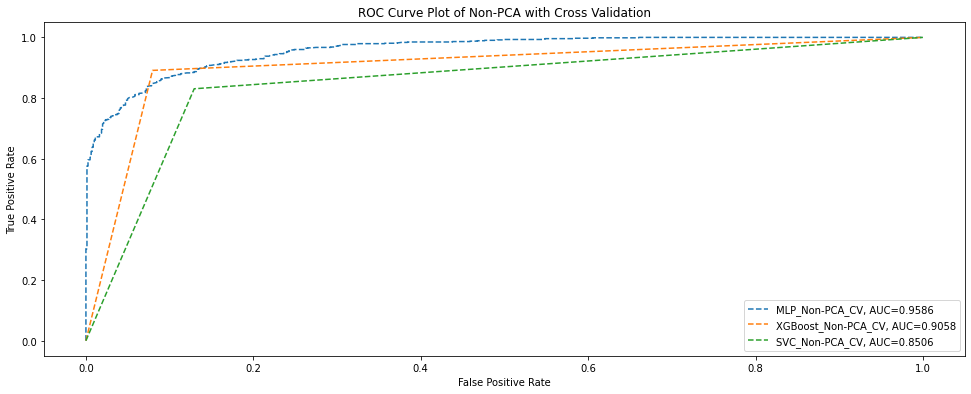

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()